# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import json

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key
weather_api_key = "e24d2a3acc4a478e443e33e1ede8c358"


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city_url = url + "q=" + cities[0] + "&units=metric" + "&appid=" + weather_api_key


# city_weather = requests.get(city_url).json()
# city_lat = city_weather['coord']['lat']
# city_lng = city_weather['coord']['lon']
# city_max_temp = city_weather['main']['temp_max']
# city_humidity = city_weather['main']['humidity']
# city_clouds = city_weather['clouds']['all']
# city_wind = city_weather['wind']['speed']
# city_country = city_weather['sys']['country']
# city_date = city_weather['dt']

        # Append the City information into city_data list
# city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# print(city_weather.url)
# print(city_weather)
# print(city_data)

{'coord': {'lon': 13.5036, 'lat': 59.3793}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.31, 'feels_like': -3.21, 'temp_min': 0.31, 'temp_max': 0.31, 'pressure': 1004, 'humidity': 93}, 'visibility': 5000, 'wind': {'speed': 3.09, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1674168618, 'sys': {'type': 1, 'id': 1779, 'country': 'SE', 'sunrise': 1674114199, 'sunset': 1674139765}, 'timezone': 3600, 'id': 2701680, 'name': 'Karlstad', 'cod': 200}


In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belaya gora
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | morant bay
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | miyako
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | tovarkovo
Processing Record 10 of Set 1 | ashoknagar
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | santa rosa
Processing Record 15 of Set 1 | cotonou
Processing Record 16 of Set 1 | festus
Processing Record 17 of Set 1 | el estor
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | gorontalo
Processing Record 20 of Set 1 | warqla
City not found. Skipping...
Processing Recor

In [9]:
len(city_data)

584

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belaya gora,68.5333,146.4167,-44.41,100,89,0.74,RU,1674448429
1,lebu,-37.6167,-73.6500,13.87,95,4,3.81,CL,1674448430
2,srednekolymsk,67.4500,153.6833,-34.92,96,100,2.19,RU,1674448430
3,morant bay,17.8815,-76.4093,25.79,80,25,5.48,JM,1674448431
4,dikson,73.5069,80.5464,-24.00,91,100,10.38,RU,1674448390


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belaya gora,68.5333,146.4167,-44.41,100,89,0.74,RU,1674448429
1,lebu,-37.6167,-73.6500,13.87,95,4,3.81,CL,1674448430
2,srednekolymsk,67.4500,153.6833,-34.92,96,100,2.19,RU,1674448430
3,morant bay,17.8815,-76.4093,25.79,80,25,5.48,JM,1674448431
4,dikson,73.5069,80.5464,-24.00,91,100,10.38,RU,1674448390


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

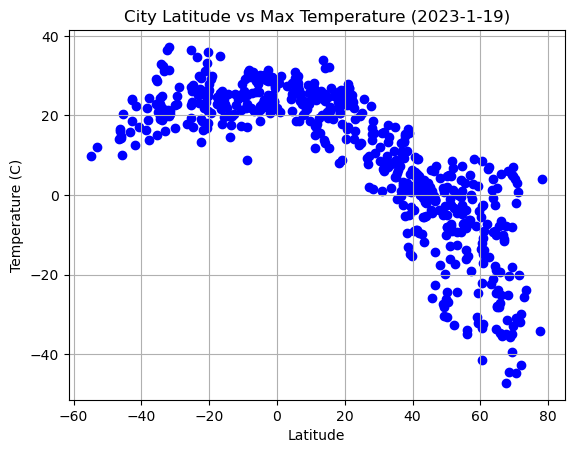

In [14]:
# Build scatter plot for latitude vs. temperature
scatter_x = city_data_df['Lat']
temp_y = city_data_df['Max Temp']
plt.scatter(scatter_x, temp_y, color="blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

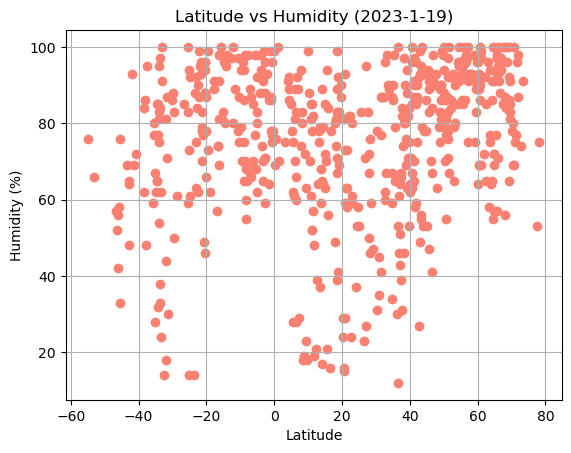

In [15]:
# Build the scatter plots for latitude vs. humidity
humid_y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(scatter_x, humid_y, color = "salmon")
plt.title("Latitude vs Humidity (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

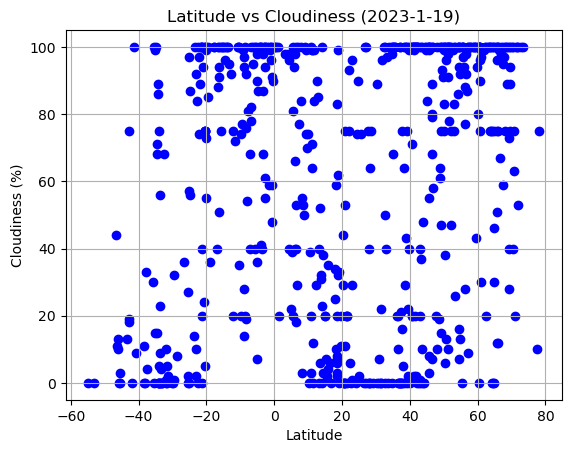

In [16]:
# Build the scatter plots for latitude vs. cloudiness
cloud_y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(scatter_x, cloud_y, color = "blue")
plt.title("Latitude vs Cloudiness (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

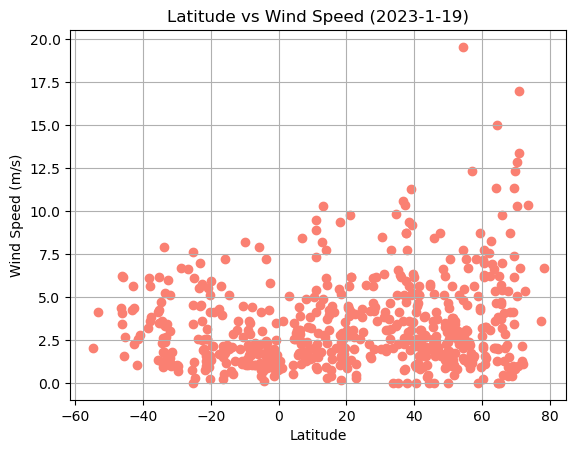

In [17]:
# Build the scatter plots for latitude vs. wind speed
wind_y = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(scatter_x, wind_y, color = "salmon")
plt.title("Latitude vs Wind Speed (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots

# def regression(): 
#     n_slope, n_int, n_r, n_p, n_stderr = stats.linregress(x,y)

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,belaya gora,68.5333,146.4167,-44.41,100,89,0.74,RU,1674448429
2,srednekolymsk,67.4500,153.6833,-34.92,96,100,2.19,RU,1674448430
3,morant bay,17.8815,-76.4093,25.79,80,25,5.48,JM,1674448431
4,dikson,73.5069,80.5464,-24.00,91,100,10.38,RU,1674448390
5,miyako,39.6367,141.9525,0.70,84,100,3.56,JP,1674448431


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,13.87,95,4,3.81,CL,1674448430
9,ushuaia,-54.8000,-68.3000,9.81,76,0,2.06,AR,1674448433
10,isangel,-19.5500,169.2667,29.19,73,85,2.16,VU,1674448434
17,mahebourg,-20.4081,57.7000,26.25,88,75,1.54,MU,1674448438
26,hobart,-42.8794,147.3294,24.04,65,75,5.66,AU,1674448443


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8352922010303389


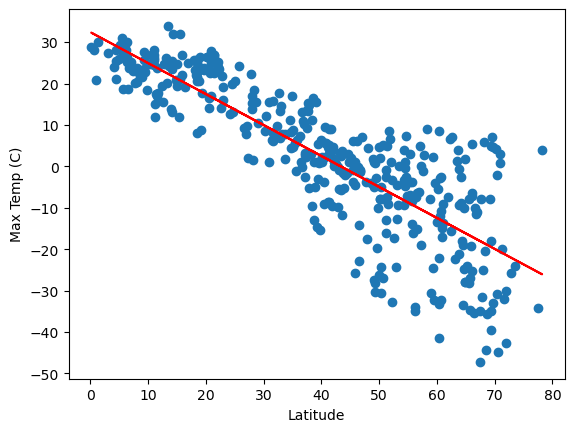

In [21]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
n_slope, n_int, n_r, n_p, n_stderr = stats.linregress(north_lat, north_temp)
n_fit = n_slope * north_lat + n_int
plt.scatter(north_lat, north_temp)
plt.plot(north_lat, n_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {n_r}")



The r-value is: 0.35711234857029395


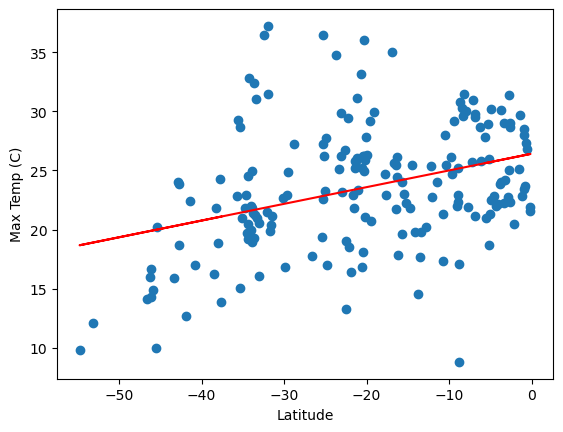

In [22]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
s_slope, s_int, s_r, s_p, s_stderr = stats.linregress(south_lat, south_temp)
s_fit = s_slope * south_lat + s_int
plt.scatter(south_lat, south_temp)
plt.plot(south_lat, s_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {s_r}")

**Discussion about the linear relationship:** The relationship between latitude and temperature is pretty consistent, with r-values the represent the visual data. As you get closer to the pole in the northern hemisphere, you get lower temperatures. In the southern hemisphere, due to various geographical elements, the relationship still exists but is a lot weaker, as represented by a lower r-value.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3948741630707487


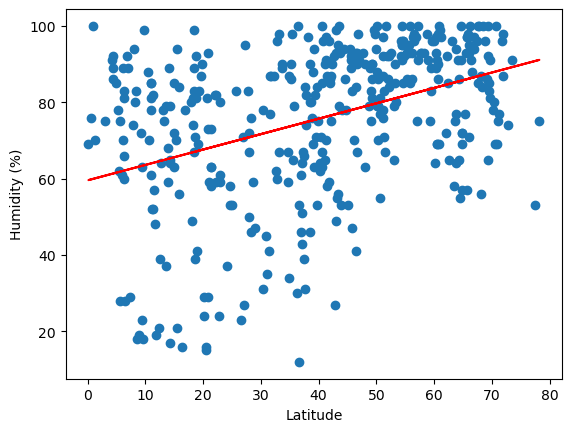

In [23]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_hum = northern_hemi_df['Humidity']
n_hslope, n_hint, n_hr, n_hp, n_hstderr = stats.linregress(north_lat, north_hum)
n_hfit = n_hslope * north_lat + n_hint
plt.scatter(north_lat, north_hum)
plt.plot(north_lat, n_hfit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {n_hr}")

The r-value is: 0.3749716506376461


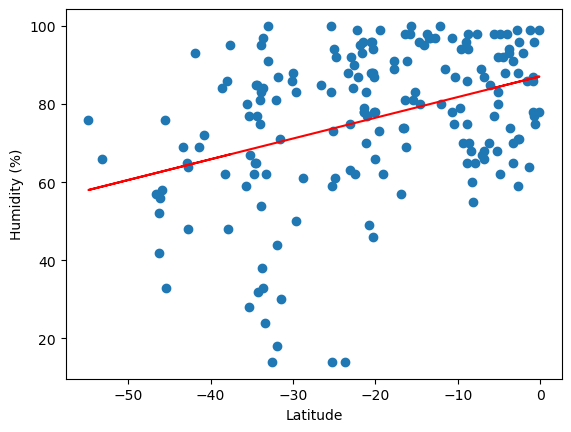

In [26]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_hum = southern_hemi_df['Humidity']
s_hslope, s_hint, s_hr, s_hp, s_hstderr = stats.linregress(south_lat, south_hum)
s_hfit = s_hslope * south_lat + s_hint
plt.scatter(south_lat, south_hum)
plt.plot(south_lat, s_hfit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {s_hr}")

**Discussion about the linear relationship:** While the experiential answer would be that there is more humiidity closer to the tropics, the data does not support that. Humidity and latitude have no correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3111451137779761


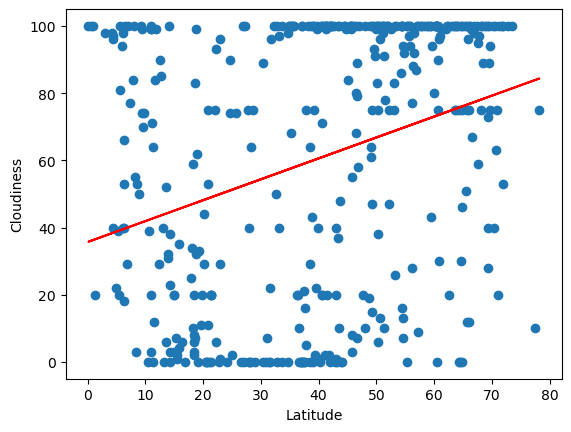

In [25]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_cloud = northern_hemi_df['Cloudiness']
n_cslope, n_cint, n_cr, n_cp, n_cstderr = stats.linregress(north_lat, north_cloud)
n_cfit = n_cslope * north_lat + n_cint
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, n_cfit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {n_cr}")

The r-value is: 0.5770285018579145


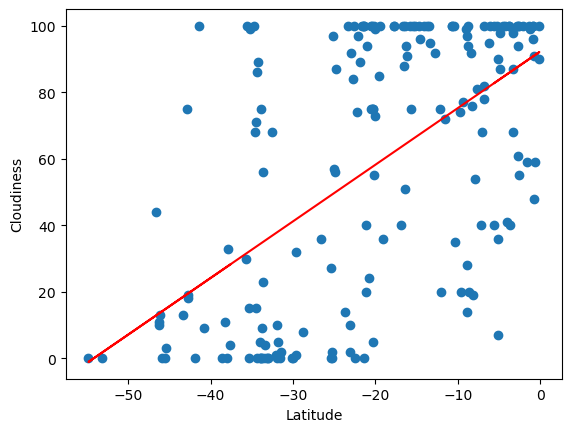

In [27]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_cloud = southern_hemi_df['Cloudiness']
s_cslope, s_cint, s_cr, s_cp, s_cstderr = stats.linregress(south_lat, south_cloud)
s_cfit = s_cslope * south_lat + s_cint
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, s_cfit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {s_cr}")

**Discussion about the linear relationship:** Clouds are everywhere. They do not seem to have any relationship with latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15023022540925668


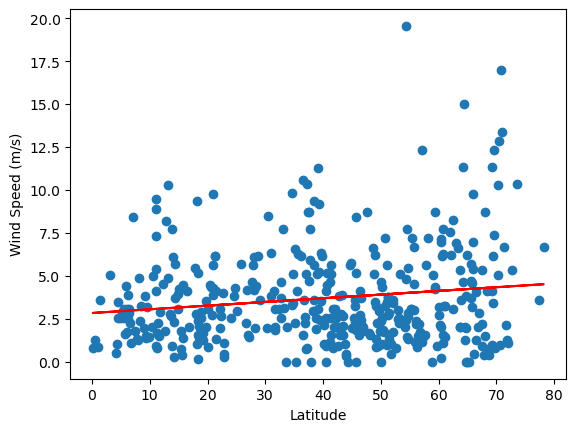

In [28]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']
n_wslope, n_wint, n_wr, n_wp, n_wstderr = stats.linregress(north_lat, north_wind)
n_wfit = n_wslope * north_lat + n_wint
plt.scatter(north_lat, north_wind)
plt.plot(north_lat, n_wfit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {n_wr}")

The r-value is: -0.26662479899874725


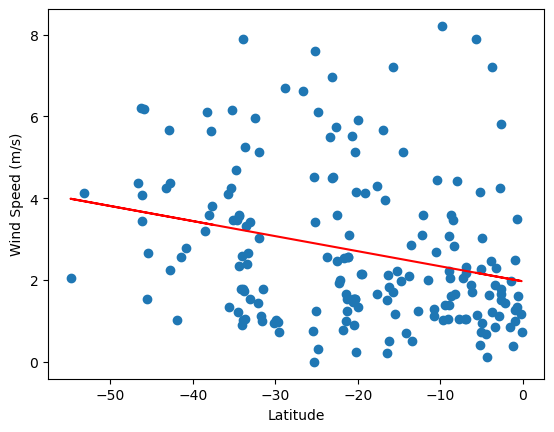

In [29]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_wind = southern_hemi_df['Wind Speed']
s_wslope, s_wint, s_wr, s_wp, s_wstderr = stats.linregress(south_lat, south_wind)
s_wfit = s_wslope * south_lat + s_wint
plt.scatter(south_lat, south_wind)
plt.plot(south_lat, s_wfit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {s_wr}")

**Discussion about the linear relationship:** There does not seem to a be strong correlation between wind speed and latitude. The only statistically relevant details are the northern hemisphere outliers that are driving the data, but even then, they're not outside the scope of the 1.5IQR rule. 